In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [6]:
img_height,img_width=256,256
batch_size=8
directory = '/home/axernox/Resnet50/tbx11k-simplified_can/traincan'
train = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2065 files belonging to 3 classes.


In [7]:
directoryval = '/home/axernox/Resnet50/tbx11k-simplified_can/valcan'
val = keras.utils.image_dataset_from_directory(
    directoryval,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 800 files belonging to 3 classes.


In [4]:
directorytest = '/home/axernox/Resnet50/tbx11k-simplified_can/testcan'
test = keras.utils.image_dataset_from_directory(
    directorytest,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 291 files belonging to 3 classes.


In [5]:
class_names = train.class_names
print(class_names)

['healthy', 'sick_no_tb', 'tb']


In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=3,
                   weights=None)
for layer in pretrained_model.layers:
        layer.trainable=False
for layer in pretrained_model.layers[-10:]:
    layer.trainable = True

x = pretrained_model.output
x = Dense(512, activation='relu')(x)
output = Dense(2, activation='softmax')(x)      

resnet_model = Model(inputs=pretrained_model.input, outputs=output)


In [7]:
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 4,467,203 (17.04 MB)

 Non-trainable params: 20,171,136 (76.95 MB)

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

### With CLAHE

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
historycl = resnet_model.fit(
  train,
  validation_data=val,
  epochs=50,
  batch_size=8,
  callbacks=[early_stopping]
)

Epoch 1/50


I0000 00:00:1726376887.645509    1388 service.cc:145] XLA service 0x7f49600675b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726376887.645579    1388 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-09-15 10:38:07.827288: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-15 10:38:08.679404: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  5/259 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.3512 - loss: 4.5656 

I0000 00:00:1726376896.456528    1388 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


259/259 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.6245 - loss: 1.6483 - val_accuracy: 0.7975 - val_loss: 0.6553
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.6896 - loss: 1.5090 - val_accuracy: 0.5200 - val_loss: 3.7704
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.7816 - loss: 0.8254 - val_accuracy: 0.7225 - val_loss: 2.5044
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.7663 - loss: 1.1337 - val_accuracy: 0.7937 - val_loss: 1.9712
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8200 - loss: 0.7257 - val_accuracy: 0.8825 - val_loss: 0.5177
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.8714 - loss: 0.5534 - val_accuracy: 0.5663 - val_loss: 3.5476
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.8251 - loss: 0.8434 - val_accuracy: 0.7875 - val_loss: 2.4529
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.8057 - loss: 1.0741 - val_accurac

In [10]:
pred = resnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

35/37 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

I0000 00:00:1726377344.712346    5800 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1688', 4 bytes spill stores, 4 bytes spill loads



37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step


2024-09-15 10:45:47.557150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=val.class_names))

              precision    recall  f1-score   support

     healthy       0.39      0.45      0.42       107
  sick_no_tb       0.46      0.46      0.46       107
          tb       0.18      0.14      0.16        77

    accuracy                           0.37       291
   macro avg       0.34      0.35      0.35       291
weighted avg       0.36      0.37      0.36       291



<Axes: >

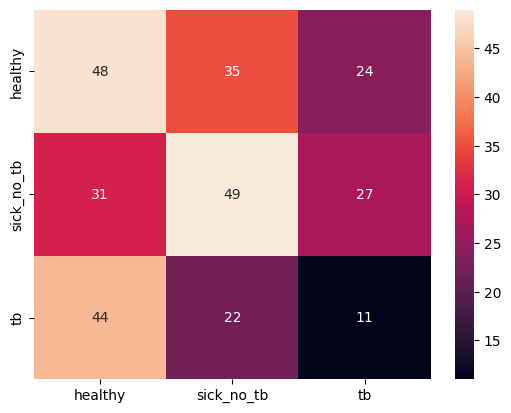

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=val.class_names, yticklabels=val.class_names)